<a href="https://colab.research.google.com/github/armandoordonez/deeplearning/blob/main/Overfitting_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrantes:**
- **Jesus Garces - A00368408**
- **Juan Camilo Ramirez -A00347605**

El conjunto de datos MNIST se utiliza comúnmente como un punto de referencia para probar y comparar algoritmos de clasificación y técnicas de reconocimiento de patrones, especialmente en el contexto de reconocimiento de caracteres. Tiene las siguientes características:

Imágenes en escala de grises: Cada imagen en el conjunto de datos MNIST es una imagen en escala de grises de 28x28 píxeles, lo que significa que cada imagen tiene una resolución de 28x28 píxeles y cada píxel tiene un valor de intensidad que varía entre 0 y 255.

Etiquetas de clase: Cada imagen está etiquetada con el dígito que representa, es decir, una de las clases del 0 al 9.

Conjuntos de entrenamiento y prueba: El conjunto de datos MNIST se divide típicamente en un conjunto de entrenamiento, que se utiliza para entrenar modelos de aprendizaje automático, y un conjunto de prueba, que se utiliza para evaluar la precisión del modelo entrenado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/My Drive/datasets/dataset/cat_vs_dog/train'
val_path = '/content/drive/My Drive/datasets/dataset/cat_vs_dog/val'

In [ ]:
import os
import cv2
import numpy as np

images_array = []
label_array = []

def load_data(path):
    images = []
    images_arr = []
    labels = []
    label_arr = []

    for category in os.listdir(path):
        categoria_path = os.path.join(path, category)
        for imagen_nombre in os.listdir(categoria_path):
            imagen_path = os.path.join(categoria_path, imagen_nombre)
            image = cv2.imread(imagen_path)
            image = cv2.resize(image, (255, 255))  # Redimensionar la imagen si es necesario
            images.append(image.flatten())
            images_arr.append(image)
            images_array.append(image)
            labels.append(1 if category == 'dog' else 0)
            label_arr.append(category)
            label_array.append(category)

    return np.array(images), np.array(labels)

In [ ]:
train_data, train_labels = load_data(train_path)
test_data, test_labels = load_data(val_path)

In [ ]:
"""numero_palabras = 5000 # define las palabras usadas del dataset

from keras.datasets import imdb
# https://keras.io/api/datasets/imdb/
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=numero_palabras)"""

In [ ]:
train_data.shape

(275, 195075)

In [ ]:
def vectorize_sequences(sequences, dimension=numero_atributos):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## **Testing Network's Size**

In [ ]:
from keras import models
from keras.layers import Dense
from keras import layers

def build_model(neurons_per_layer):
  testing_model = models.Sequential()

  for neurons in neurons_per_layer:

    if neurons_per_layer.index(neurons) == 0:
      testing_model.add(Dense(neurons, activation='relu', input_shape=(numero_atributos,)))
    elif neurons_per_layer.index(neurons) == len(neurons_per_layer) - 1:
      testing_model.add(Dense(neurons, activation='sigmoid'))
    else:
      testing_model.add(Dense(neurons, activation='relu'))

  return testing_model

In [ ]:
import matplotlib.pyplot as plt

def plot_val_loss(epochs, *val_losses, labels=None):
    plt.figure(figsize=(10, 6))
    for i, val_loss in enumerate(val_losses):
        if labels:
            label = labels[i]
        else:
            label = f'Model {i+1}'
        plt.plot(epochs, val_loss, label=label)
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')
    plt.legend()
    plt.show()

In [ ]:
neurons_per_model = [
    [32, 32, 32, 1],
    [16, 16, 16, 1],
    [8, 8, 8, 1],

    [4, 4, 4, 1],
    [2, 2, 2, 1]
]

testing_models = []
val_loss_set = []

for n_per_model in neurons_per_model:
  model = build_model(n_per_model)
  testing_models.append(model)


for model in testing_models:
  model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])
  model_hist = model.fit(x_train, y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_test, y_test),
                            verbose=0)

  model_val_loss = model_hist.history['val_loss']
  val_loss_set.append(model_val_loss)


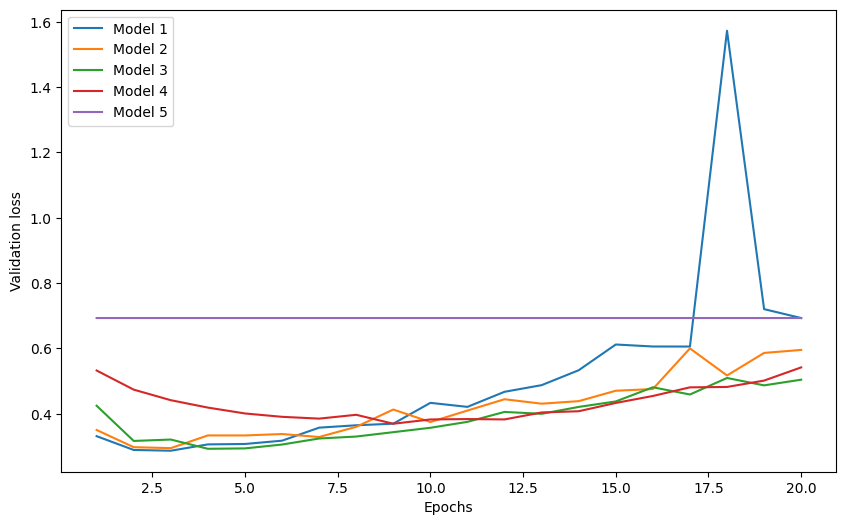

In [ ]:
epochs = range(1, 21)
plot_val_loss(epochs, *val_loss_set)



## **Testing another set**

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras import models
from keras.layers import Dense

# Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Normalizar los valores de píxeles al rango [0, 1]
x_train = train_data.reshape((60000, 28 * 28)).astype('float32') / 255
x_test = test_data.reshape((10000, 28 * 28)).astype('float32') / 255

# Convertir las etiquetas en un arreglo NumPy y establecer el tipo en 'float32'
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

# Define y compila el modelo original
original_model = models.Sequential()
original_model.add(Dense(16, activation='relu', input_shape=(28 * 28,)))
original_model.add(Dense(16, activation='relu'))
original_model.add(Dense(10, activation='softmax'))  # Capa de salida para clasificación multiclase

original_model.compile(optimizer='rmsprop',
                       loss='sparse_categorical_crossentropy',  # Función de pérdida adecuada para clasificación multiclase
                       metrics=['accuracy'])

In [ ]:
# Define y compila el modelo más pequeño
smaller_model = models.Sequential()
smaller_model.add(Dense(4, activation='relu', input_shape=(28 * 28,)))
smaller_model.add(Dense(4, activation='relu'))
smaller_model.add(Dense(10, activation='softmax'))

smaller_model.compile(optimizer='rmsprop',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
# Entrena ambos modelos
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
118/118 [==============================] - 1s 7ms/step - loss: 1.2152 - accuracy: 0.6406 - val_loss: 0.5863 - val_accuracy: 0.8558
Epoch 2/20
118/118 [==============================] - 1s 4ms/step - loss: 0.4534 - accuracy: 0.8765 - val_loss: 0.3491 - val_accuracy: 0.8998
Epoch 3/20
118/118 [==============================] - 1s 5ms/step - loss: 0.3291 - accuracy: 0.9058 - val_loss: 0.2968 - val_accuracy: 0.9147
Epoch 4/20
118/118 [==============================] - 1s 4ms/step - loss: 0.2875 - accuracy: 0.9173 - val_loss: 0.2851 - val_accuracy: 0.9157
Epoch 5/20
118/118 [==============================] - 1s 4ms/step - loss: 0.2650 - accuracy: 0.9236 - val_loss: 0.2644 - val_accuracy: 0.9227
Epoch 6/20
118/118 [==============================] - 1s 4ms/step - loss: 0.2503 - accuracy: 0.9275 - val_loss: 0.2425 - val_accuracy: 0.9294
Epoch 7/20
118/118 [==============================] - 1s 4ms/step - loss: 0.2387 - accuracy: 0.9319 - val_loss: 0.2319 - val_accuracy: 0.9339
Epoch 

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
118/118 [==============================] - 3s 17ms/step - loss: 1.8152 - accuracy: 0.3794 - val_loss: 1.5446 - val_accuracy: 0.5006
Epoch 2/20
118/118 [==============================] - 1s 10ms/step - loss: 1.4496 - accuracy: 0.5153 - val_loss: 1.3378 - val_accuracy: 0.5173
Epoch 3/20
118/118 [==============================] - 0s 4ms/step - loss: 1.2990 - accuracy: 0.5407 - val_loss: 1.2265 - val_accuracy: 0.5601
Epoch 4/20
118/118 [==============================] - 0s 4ms/step - loss: 1.2070 - accuracy: 0.5699 - val_loss: 1.1477 - val_accuracy: 0.5853
Epoch 5/20
118/118 [==============================] - 0s 4ms/step - loss: 1.1265 - accuracy: 0.6004 - val_loss: 1.0709 - val_accuracy: 0.6201
Epoch 6/20
118/118 [==============================] - 0s 4ms/step - loss: 1.0549 - accuracy: 0.6356 - val_loss: 1.0097 - val_accuracy: 0.6578
Epoch 7/20
118/118 [==============================] - 1s 4ms/step - loss: 0.9933 - accuracy: 0.6945 - val_loss: 0.9535 - val_accuracy: 0.7132
Epoc

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

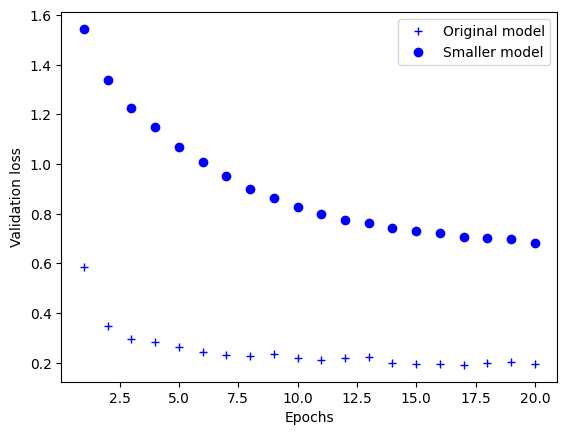

In [ ]:
# Graficar la pérdida de validación para ambos modelos
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
# Define y compila el modelo más grande
bigger_model = models.Sequential()
bigger_model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
bigger_model.add(Dense(128, activation='relu'))
bigger_model.add(Dense(10, activation='softmax'))

bigger_model.compile(optimizer='rmsprop',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))


Epoch 1/20
118/118 [==============================] - 2s 13ms/step - loss: 0.5094 - accuracy: 0.8623 - val_loss: 0.2625 - val_accuracy: 0.9245
Epoch 2/20
118/118 [==============================] - 2s 18ms/step - loss: 0.2141 - accuracy: 0.9370 - val_loss: 0.1736 - val_accuracy: 0.9487
Epoch 3/20
118/118 [==============================] - 1s 11ms/step - loss: 0.1532 - accuracy: 0.9542 - val_loss: 0.1476 - val_accuracy: 0.9557
Epoch 4/20
118/118 [==============================] - 1s 11ms/step - loss: 0.1192 - accuracy: 0.9645 - val_loss: 0.1246 - val_accuracy: 0.9611
Epoch 5/20
118/118 [==============================] - 1s 11ms/step - loss: 0.0964 - accuracy: 0.9711 - val_loss: 0.1364 - val_accuracy: 0.9570
Epoch 6/20
118/118 [==============================] - 1s 10ms/step - loss: 0.0805 - accuracy: 0.9757 - val_loss: 0.1248 - val_accuracy: 0.9627
Epoch 7/20
118/118 [==============================] - 1s 10ms/step - loss: 0.0675 - accuracy: 0.9799 - val_loss: 0.0959 - val_accuracy: 0.9707

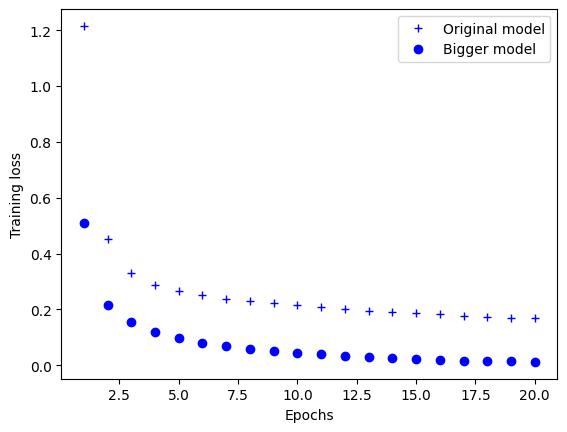

In [ ]:
# Plotea la pérdida de entrenamiento para ambos modelos
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

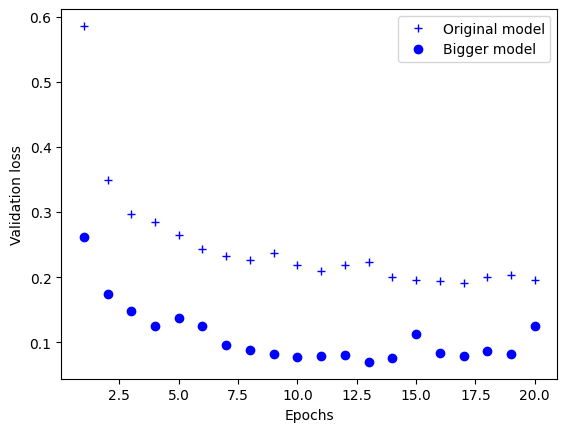

In [ ]:
# Plotea la pérdida de validación para ambos modelos
import matplotlib.pyplot as plt

epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

#Probando la regularizacion

In [ ]:
from keras import regularizers

# Define y compila el modelo con regularización L2
l2_model = models.Sequential()
l2_model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001),
                   activation='relu', input_shape=(28 * 28,)))
l2_model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001),
                   activation='relu'))
l2_model.add(Dense(10, activation='softmax'))

l2_model.compile(optimizer='rmsprop',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Entrena el modelo con regularización L2
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
118/118 [==============================] - 1s 6ms/step - loss: 1.1717 - accuracy: 0.6767 - val_loss: 0.5760 - val_accuracy: 0.8712
Epoch 2/20
118/118 [==============================] - 1s 5ms/step - loss: 0.4748 - accuracy: 0.8883 - val_loss: 0.4089 - val_accuracy: 0.9024
Epoch 3/20
118/118 [==============================] - 1s 4ms/step - loss: 0.3817 - accuracy: 0.9106 - val_loss: 0.3597 - val_accuracy: 0.9151
Epoch 4/20
118/118 [==============================] - 1s 5ms/step - loss: 0.3474 - accuracy: 0.9204 - val_loss: 0.3375 - val_accuracy: 0.9220
Epoch 5/20
118/118 [==============================] - 1s 4ms/step - loss: 0.3271 - accuracy: 0.9262 - val_loss: 0.3278 - val_accuracy: 0.9237
Epoch 6/20
118/118 [==============================] - 1s 5ms/step - loss: 0.3121 - accuracy: 0.9306 - val_loss: 0.3055 - val_accuracy: 0.9307
Epoch 7/20
118/118 [==============================] - 1s 6ms/step - loss: 0.3014 - accuracy: 0.9342 - val_loss: 0.3111 - val_accuracy: 0.9289
Epoch 

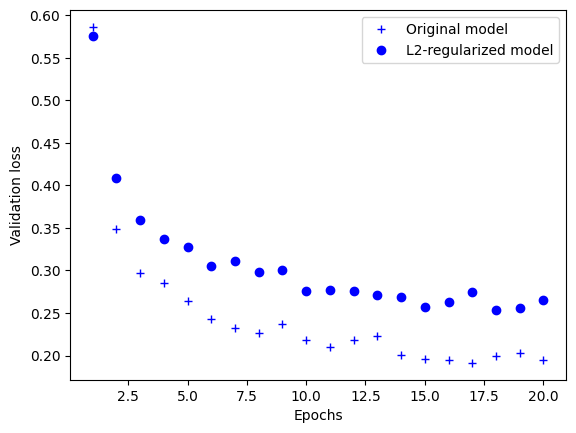

In [ ]:
# Plotea la pérdida de validación para el modelo con regularización L2
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

#DROPOUT

In [ ]:
from keras.layers import Dropout

# Define y compila el modelo con dropout
dpt_model = models.Sequential()
dpt_model.add(Dense(16, activation='relu', input_shape=(28 * 28,)))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(16, activation='relu'))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(10, activation='softmax'))

dpt_model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Entrena el modelo con dropout
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))


Epoch 1/20
118/118 [==============================] - 2s 13ms/step - loss: 1.9711 - accuracy: 0.2758 - val_loss: 1.4791 - val_accuracy: 0.5846
Epoch 2/20
118/118 [==============================] - 1s 11ms/step - loss: 1.6756 - accuracy: 0.3923 - val_loss: 1.1883 - val_accuracy: 0.7799
Epoch 3/20
118/118 [==============================] - 1s 9ms/step - loss: 1.5281 - accuracy: 0.4520 - val_loss: 0.9869 - val_accuracy: 0.7973
Epoch 4/20
118/118 [==============================] - 1s 5ms/step - loss: 1.4405 - accuracy: 0.4776 - val_loss: 0.8959 - val_accuracy: 0.8368
Epoch 5/20
118/118 [==============================] - 1s 5ms/step - loss: 1.3744 - accuracy: 0.5020 - val_loss: 0.8011 - val_accuracy: 0.8576
Epoch 6/20
118/118 [==============================] - 1s 7ms/step - loss: 1.3245 - accuracy: 0.5181 - val_loss: 0.7422 - val_accuracy: 0.8546
Epoch 7/20
118/118 [==============================] - 1s 9ms/step - loss: 1.2774 - accuracy: 0.5325 - val_loss: 0.6964 - val_accuracy: 0.8672
Epoc

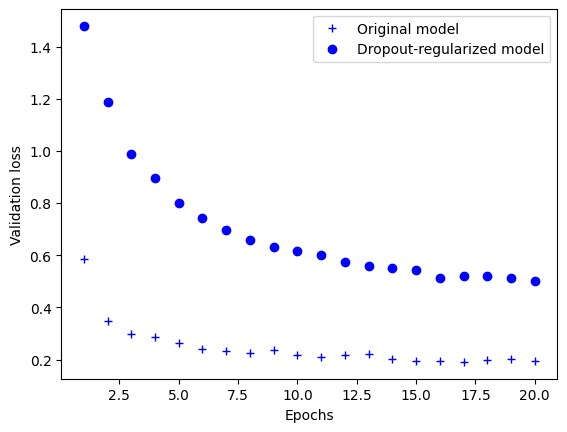

In [ ]:
# Plotea la pérdida de validación para el modelo con dropout
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

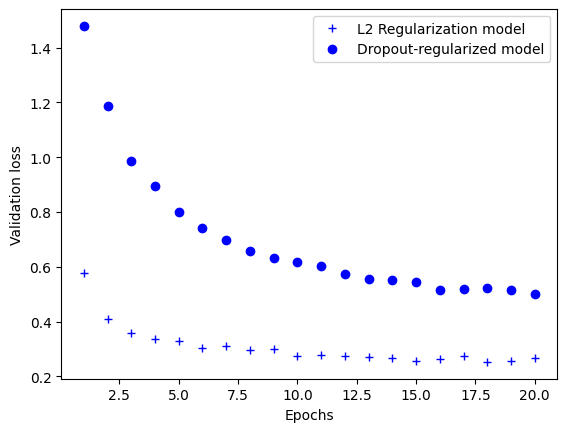

In [ ]:
# Plotea la pérdida de validación para comparar con el modelo con regularización L2
plt.plot(epochs, l2_model_val_loss, 'b+', label='L2 Regularization model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

#GRID SEARCH IMPLEMENTATION

In [ ]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV


from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, Activation
from scikeras.wrappers import KerasClassifier, KerasRegressor

# Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Tomar la mitad de los datos de entrenamiento y de prueba
x_train, _, y_train, _ = train_test_split(train_data, train_labels, test_size=0.5, random_state=42)
x_test, _, y_test, _ = train_test_split(test_data, test_labels, test_size=0.5, random_state=42)

# Normalizar los valores de píxeles al rango [0, 1]
x_train = x_train.reshape((len(x_train), 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((len(x_test), 28 * 28)).astype('float32') / 255

# Convertir las etiquetas en un arreglo NumPy y establecer el tipo en 'int32'
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

# Define una función para crear el modelo
def create_model():
    model = Sequential()
    model.add(Dense(36, input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(36, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Se cambió a 10 unidades para clasificación de 10 clases
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
batch_size = [10, 20, 40, 60]
epochs = [5, 10, 20, 25]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)
grid_result = grid.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


ValueError: 
All the 48 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 536, in _fit_keras_model
    raise e
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 531, in _fit_keras_model
    key = metric_name(key)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/utils/__init__.py", line 111, in metric_name
    fn_or_cls = keras_metric_get(metric)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/__init__.py", line 204, in get
    raise ValueError(f"Could not interpret metric identifier: {identifier}")
ValueError: Could not interpret metric identifier: loss
